## PyDDM Experimentation

This notebook will highlight some of PyDDM's capabilities then compare it to aDDM's results.

First, some basic imports:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyddm

To show a fixed-parameter model's probability distribution function (pdf) solution, define the model, then solve it using `.solve()`.

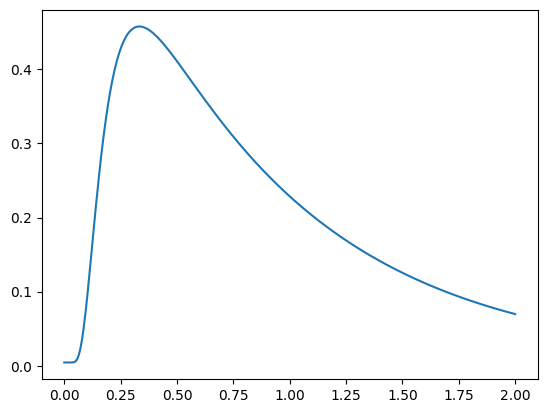

In [ ]:
m = pyddm.gddm() # model
s = m.solve() # solution
plt.plot(s.t_domain, s.pdf("correct"))
plt.show()

Note that two distributions are generated: a correct solution and an incorrect solution. By default, the two distributions are named `"correct"` and `"error"`, but they can and should be renamed according to collected data.

We can investigate the parameters of a model by doing `.show()`.

In [ ]:
m.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 0.000000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fixed parameters:
    - x0: 0.000000
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.000000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000



Now, what if we wanted to fit parameters to a model? Here, we use the original model but make drift rate variable. We then pass a dictionary in using the variable kwarg as a key and a tuple range as the value.

In [ ]:
model_to_fit = pyddm.gddm(drift="d", noise=1.0, bound=1, nondecision=0.2, starting_position=0,
                          parameters={"d": (-3,3)})
model_to_fit.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fittable parameters:
    - drift: Fittable (default 1.014791)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fixed parameters:
    - x0: 0.000000
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000



For now, we can use simulated data from the solution to the prior model.

In [ ]:
samp_simulated = s.sample(10000, seed=123098)

Then, we fit.

In [ ]:
model_to_fit.fit(samp_simulated, lossfunction=pyddm.LossBIC, verbose=True)
model_to_fit.show()

Info: Model(name='', drift=DriftConstant(drift=Fitted(1.3120257072615602, minval=-3, maxval=3)), noise=NoiseConstant(noise=1.0), bound=BoundConstant(B=1), IC=ICPointRatio(x0=0), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=0.2), OverlayUniformMixture(umixturecoef=0.02)]), dx=0.005, dt=0.005, T_dur=2.0) loss=39581.15456424863
Info: Model(name='', drift=DriftConstant(drift=Fitted(2.30674440965321, minval=-3, maxval=3)), noise=NoiseConstant(noise=1.0), bound=BoundConstant(B=1), IC=ICPointRatio(x0=0), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=0.2), OverlayUniformMixture(umixturecoef=0.02)]), dx=0.005, dt=0.005, T_dur=2.0) loss=51483.28774327074
Info: Model(name='', drift=DriftConstant(drift=Fitted(-0.10525236683602857, minval=-3, maxval=3)), noise=NoiseConstant(noise=1.0), bound=BoundConstant(B=1), IC=ICPointRatio(x0=0), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=0.2), OverlayUniformMixture(umixturecoef=0.02)]), dx=0.005, dt=0.005, T_dur

differential_evolution step 1: f(x)= 32034.01870900473
differential_evolution step 2: f(x)= 31979.112474182017
differential_evolution step 3: f(x)= 31967.487059519863
Polishing solution with 'L-BFGS-B'
Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 0.015434
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fixed parameters:
    - x0: 0.000000
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed paramete

We should expect this fitting function to yield results close to that of our original model. There is variation in the drift coefficient `0.02489657` vs `0.00` from the original model due to randomness. 

To get closer to our ultimate goal of building an aDDM, we need to first understand how to use a function instead of a tuple range for drift rate. First, define the function, then, plug in the parameter as normal.

In [ ]:
def drift_function(d):
    return 2*d
model_with_function = pyddm.gddm(drift=drift_function, 
                                 parameters={"d": (-1, 1)})
model_with_function.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftEasy:
    easy_drift
    Fittable parameters:
    - d: Fittable (default -0.160592)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.000000
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fixed parameters:
    - x0: 0.000000
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.000000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000



While seemingly mundane, things can get complicated. This is a full example of PyDDM's manually defined model using some of its predefined Drift and Bound objects.

In [ ]:
from pyddm import Model
from pyddm.models import NoiseConstant, ICPointSourceCenter, OverlayNonDecision
from pyddm.models import Drift
from pyddm.models import Bound

class DriftExp(Drift):
    name = "Exponential time-dependent drift"
    required_parameters = ["drift_rate"]
    def get_drift(self, x, t, conditions, **kwargs):
        return self.drift_rate * np.exp(t)
    
class BoundCollapse(Bound):
    name = "Linearly collapsing bound"
    required_parameters = ["bound_height"]
    def get_bound(self, t, conditions, **kwargs):
        return max(self.bound_height - t, 0.25)

model = Model(
    drift=DriftExp(drift_rate=1.0),
    bound=BoundCollapse(bound_height=1.0),
    noise=NoiseConstant(noise=1.0),
    IC=ICPointSourceCenter(),
    overlay=OverlayNonDecision(nondectime=0.3),
    dx=0.005, # stepwise in x
    dt=0.005, # stepwise in time
    T_dur=1.5 # maximum range of pdf that solver calculates for
)

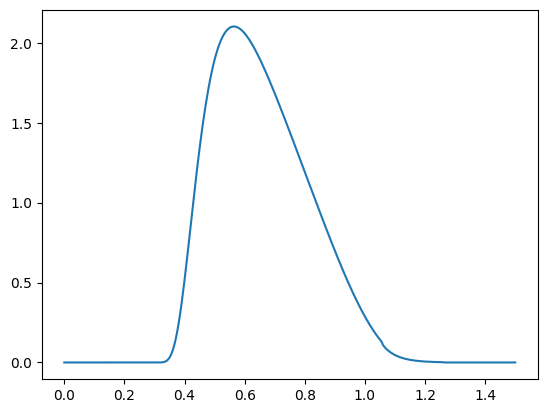

In [ ]:
solution = model.solve()
plt.plot(solution.t_domain, solution.pdf("correct"))
plt.show()

## Attentional Drift Diffusion Model

Now we can work on the aDDM. There is already a pre-set format with `pyddm.gddm()`.

Let us first generate some sample data before moving onto real data to get a sense of the structure.

In [3]:
from fixations import *

In [3]:
path = '/Users/braydenchien/Desktop/Enkavilab/DDM'
sub_id = '201'
bin_size = 0.1
create_samples_dataframe(path, sub_id, bin_size)

,choice,RT,avgWTP_left,avgWTP_right,fixation
0,0,1.8,5.00,1.50,"(0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
1,0,1.7,4.50,1.75,"(1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)"
2,0,1.7,4.75,1.00,"(0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0)"
3,0,2.1,5.00,1.00,"(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
4,1,1.5,2.75,5.00,"(0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)"
...,...,...,...,...,...
355,0,0.6,4.25,1.50,"(0, 0, 0, 0, 1, 1)"
356,1,0.5,5.00,5.00,"(1, 1, 0)"
357,0,0.7,3.75,3.25,"(0, 0, 1, 1, 1, 1)"
358,0,0.8,2.00,2.75,"(1, 0, 0, 0, 0, 0, 0)"


In [4]:
import os

def create_total_samples_dataframe_from_csv(path, batch_num):
    df = pd.DataFrame({'choice': [], 'RT': [], 'avgWTP_left': [], 'avgWTP_right': [],'fixation': []})
    for item in os.listdir(path):
        if int(item[12]) == batch_num+1:
            df = pd.concat([df, pd.read_csv(os.path.join(path, item))], ignore_index=True)
    
    return pyddm.Sample.from_pandas_dataframe(df, choice_column_name="choice", rt_column_name="RT", choice_names=("left", "right"))

In [8]:
path = '/Users/braydenchien/Desktop/Enkavilab/DDM/samples'
batch_num = 1
sample = create_total_samples_dataframe_from_csv(path, batch_num)

The model follows, using the drift function idea from earlier. Something novel is the use of conditions. These are helpful in mapping the code to collected data. Since the aDDM introduces these additional elements, value, price, and fixation all effecting drift rate under Krajbich's hypothesis, they are conditions.

In [ ]:
def drift_function(avgWTP_left, avgWTP_right, fixation, d, theta, t): # again, t is supplied internally
    current_fixation = fixation[min(int(t//bin_size), len(fixation)-1)] # only needed because some RT's are longer than others
    if current_fixation == 0:
        return d * (avgWTP_left - avgWTP_right * theta)
    else:
        return -d * (avgWTP_right - avgWTP_left * theta)

model = pyddm.gddm(drift=drift_function, noise=.1, bound=1, nondecision=0, mixture_coef=0.02,
               parameters={"d": (0, 1), "theta": (0, 1)},
               conditions=["avgWTP_left", "avgWTP_right", "fixation"],
               choice_names=("left", "right"),
               T_dur = 6,
               dx = 0.001,
               dt = 0.01
)

Fit the model.

Since hidden and visual models should have starkly different values as hypothesized by the study, perhaps understanding the difference between their values will lead to better results.

To do this, we will need to separate the hidden and visualized trials. The hidden trials are the first fourth and the third fourth. Meaning, in Batch 1, the hidden trials are trials 1-90, 181-270. In Batch 2, the hidden trials are trials 1-100, 201-300.